# Week 3 Assignment 4
##### Georgia  - Team 5

#### The dataset, collected by Davis et al in the 1930s, shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise. http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis

#### Goal: Make inferences about the relationships between (1) the women, and (2) the social events. 

### Import data and plot

In [80]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import math
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.davis_southern_women_graph()
women = ["Evelyn Jefferson",
             "Laura Mandeville",
             "Theresa Anderson",
             "Brenda Rogers",
             "Charlotte McDowd",
             "Frances Anderson",
             "Eleanor Nye",
             "Pearl Oglethorpe",
             "Ruth DeSand",
             "Verne Sanderson",
             "Myra Liddel",
             "Katherina Rogers",
             "Sylvia Avondale",
             "Nora Fayette",
             "Helen Lloyd",
             "Dorothy Murchison",
             "Olivia Carleton",
             "Flora Price"]
clubs = ["E1",
              "E2",
              "E3",
              "E4",
              "E5",
              "E6",
              "E7",
              "E8",
              "E9",
              "E10",
              "E11",
              "E12",
              "E13",
              "E14"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))

Biadjacency matrix
[[ 1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.

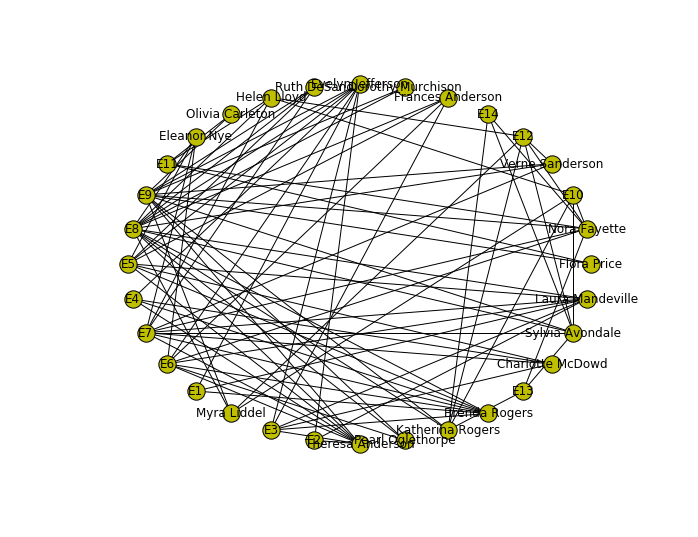

In [131]:
plt.figure(figsize=(9,7))
nx.draw_circular(G, with_labels=True, node_color="y")

##### Plot relationship between women

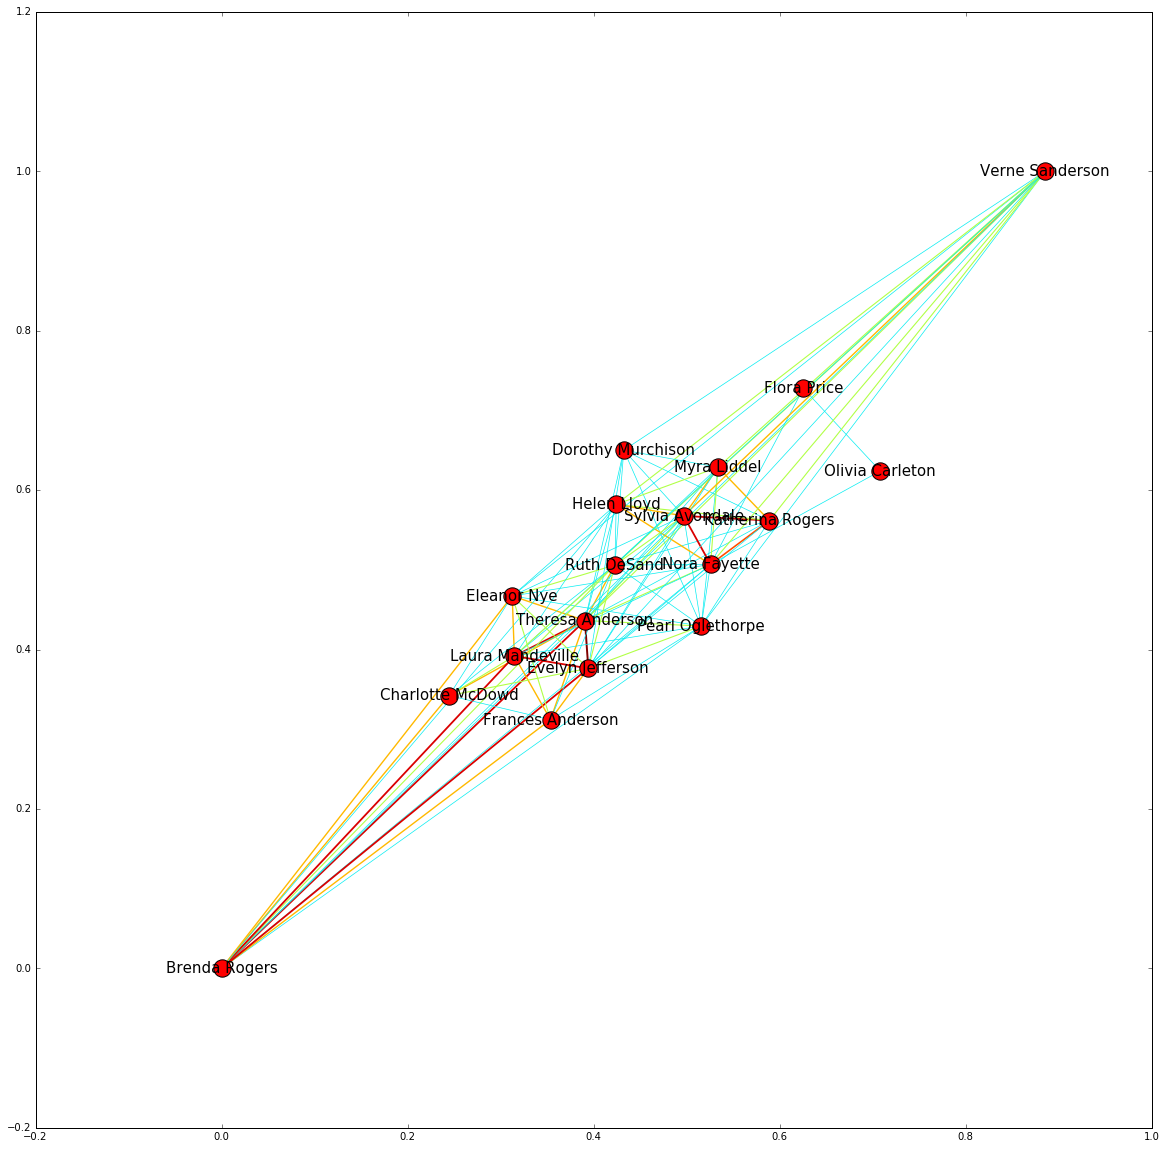

In [126]:
plt.figure(figsize=(20,20))
womnet=bipartite.weighted_projected_graph(G, women, ratio=False)
weights=[math.log(edata['weight']) for f,t,edata in womnet.edges(data=True)]
nx.draw_networkx(womnet,width=weights, edge_color=weights, font_size=15)

##### Plot relationship between clubs

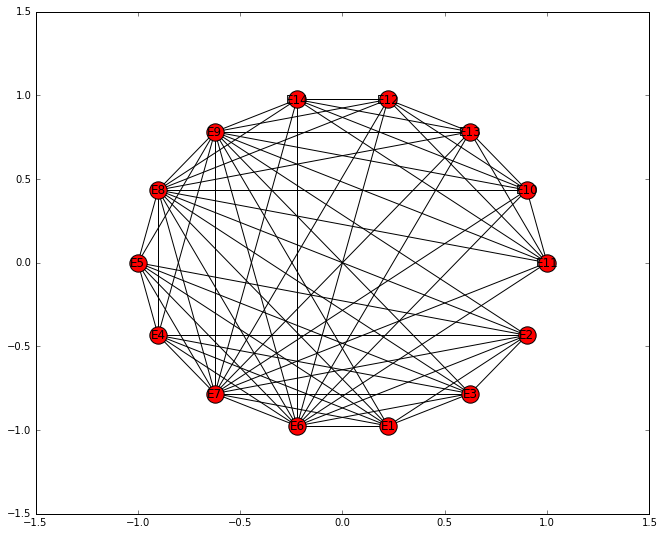

In [115]:
plt.figure(figsize=(11,9))
clubnet=bipartite.weighted_projected_graph(G, clubs, ratio=False)
#weights=[math.log(edata['weight']) for f,t,edata in womnet.edges(data=True)]
nx.draw_networkx(clubnet,pos=nx.shell_layout(clubnet))

##### Create table with degree, degree centrality, closeness centrality, betweenness centrality and eigenvecture centrality for women

##### Create table with degree, degree centrality, closeness centrality, betweenness centrality and eigenvecture centrality for clubs

##### Conclusion